In [1]:
import csv
import random

def generate_graph(csv_file):
    graph = []

    with open(csv_file, 'r') as file:
      reader = csv.DictReader(file)

      for row in reader:
        source = row['full_id']
        target = row['full_id_2']

        weight = random.randint(1, 100)

        graph.append((source, target, weight))

    return graph

file_name = 'lavictoria-streets-intersections.csv'
graph = generate_graph(file_name)

print(graph)

[('w4832869', 'w319788723', 8), ('w4832869', 'w1146112613', 30), ('w4832869', 'w1021325941', 89), ('w4832869', 'w319662804', 94), ('w24295160', 'w317310787', 57), ('w24295160', 'w338241851', 53), ('w24305428', 'w319647128', 7), ('w24305428', 'w397491214', 83), ('w28796818', 'w316901497', 11), ('w28796818', 'w1146813185', 17), ('w28796818', 'w90289133', 3), ('w28796818', 'w314787100', 66), ('w28796818', 'w90289138', 65), ('w28797435', 'w335056403', 72), ('w28797435', 'w319664464', 73), ('w28797435', 'w320464643', 39), ('w28797435', 'w671786201', 59), ('w28797591', 'w35556738', 20), ('w28797591', 'w324587998', 99), ('w28797591', 'w35556857', 17), ('w28797591', 'w338239945', 57), ('w28797591', 'w338242027', 60), ('w28798380', 'w261105735', 31), ('w28798380', 'w436615515', 55), ('w28798397', 'w35139482', 9), ('w28798397', 'w893125823', 1), ('w28798397', 'w35116500', 82), ('w28798397', 'w427826838', 45), ('w28798397', 'w1152014833', 50), ('w28798397', 'w314787100', 70), ('w34188453', 'w3147

In [5]:
import heapq

def prim_max_spanning_tree(graph):
  # Invertir los pesos de las aristas
  inverted_graph = [(u, v, -weight) for u, v, weight in graph]

  # Crear un diccionario para almacenar las aristas del árbol de expansión máxima
  max_spanning_tree = {}

  # Elegir un nodo inicial de forma aleatoria
  start = inverted_graph[0][0]

  # Crear un conjunto para almacenar los nodos visitados
  visited = set([start])

  # Crear una lista de aristas candidatas para ser consideradas en cada iteración
  candidates = []
  for edge in inverted_graph:
    if edge[0] == start:
      heapq.heappush(candidates, edge)

  # Ejecutar el algoritmo hasta que no haya más candidatos
  while candidates:
    # Obtener la arista con el mayor peso
    u, v, weight = heapq.heappop(candidates)

    # Si el nodo 'v' no ha sido visitado, agregar la arista al árbol de expansión máxima
    if v not in visited:
      visited.add(v)
      max_spanning_tree[(u, v)] = -weight  # Invertir el peso nuevamente

      # Agregar las aristas adyacentes del nodo 'v' a los candidatos
      for edge in inverted_graph:
        if edge[0] == v and edge[1] not in visited:
          heapq.heappush(candidates, edge)

  return list(max_spanning_tree.keys())

mst_prim = prim_max_spanning_tree(graph)

def show_route(max_spanning_tree):
  ids = set()
  for u, v in max_spanning_tree:
    ids.add(u)
    ids.add(v)

  sorted_ids = sorted(ids)

  print(" -> ".join(f"{node_id}" for node_id in sorted_ids))

show_route(mst_prim)

w1008734386 -> w1008734387 -> w1008734388 -> w1008734401 -> w1008734403 -> w1009000064 -> w1013422764 -> w1015929419 -> w1020155919 -> w1021325941 -> w1023690558 -> w1023690559 -> w1025935728 -> w1025935729 -> w1052003625 -> w1074838703 -> w1074838704 -> w1076187465 -> w1091383354 -> w1092458888 -> w1092458889 -> w1092458890 -> w1092669546 -> w1092669547 -> w1092669548 -> w1092681276 -> w1092690546 -> w1092690547 -> w1092690771 -> w1092690772 -> w1092690773 -> w1092691363 -> w1092691364 -> w1092691365 -> w1092691366 -> w1093019820 -> w1093232487 -> w1093232489 -> w1093232491 -> w1093232492 -> w1093232493 -> w1093232494 -> w1093232495 -> w1093232497 -> w1093232498 -> w1093232499 -> w1093232500 -> w1093241039 -> w1093241041 -> w1093241042 -> w1093241043 -> w1093241044 -> w1093961731 -> w1093961732 -> w1093961733 -> w1093976507 -> w1093976508 -> w1093976510 -> w1093990223 -> w1093990252 -> w1095299408 -> w1095299409 -> w1095299410 -> w1096062083 -> w1096062084 -> w1096062085 -> w109606208

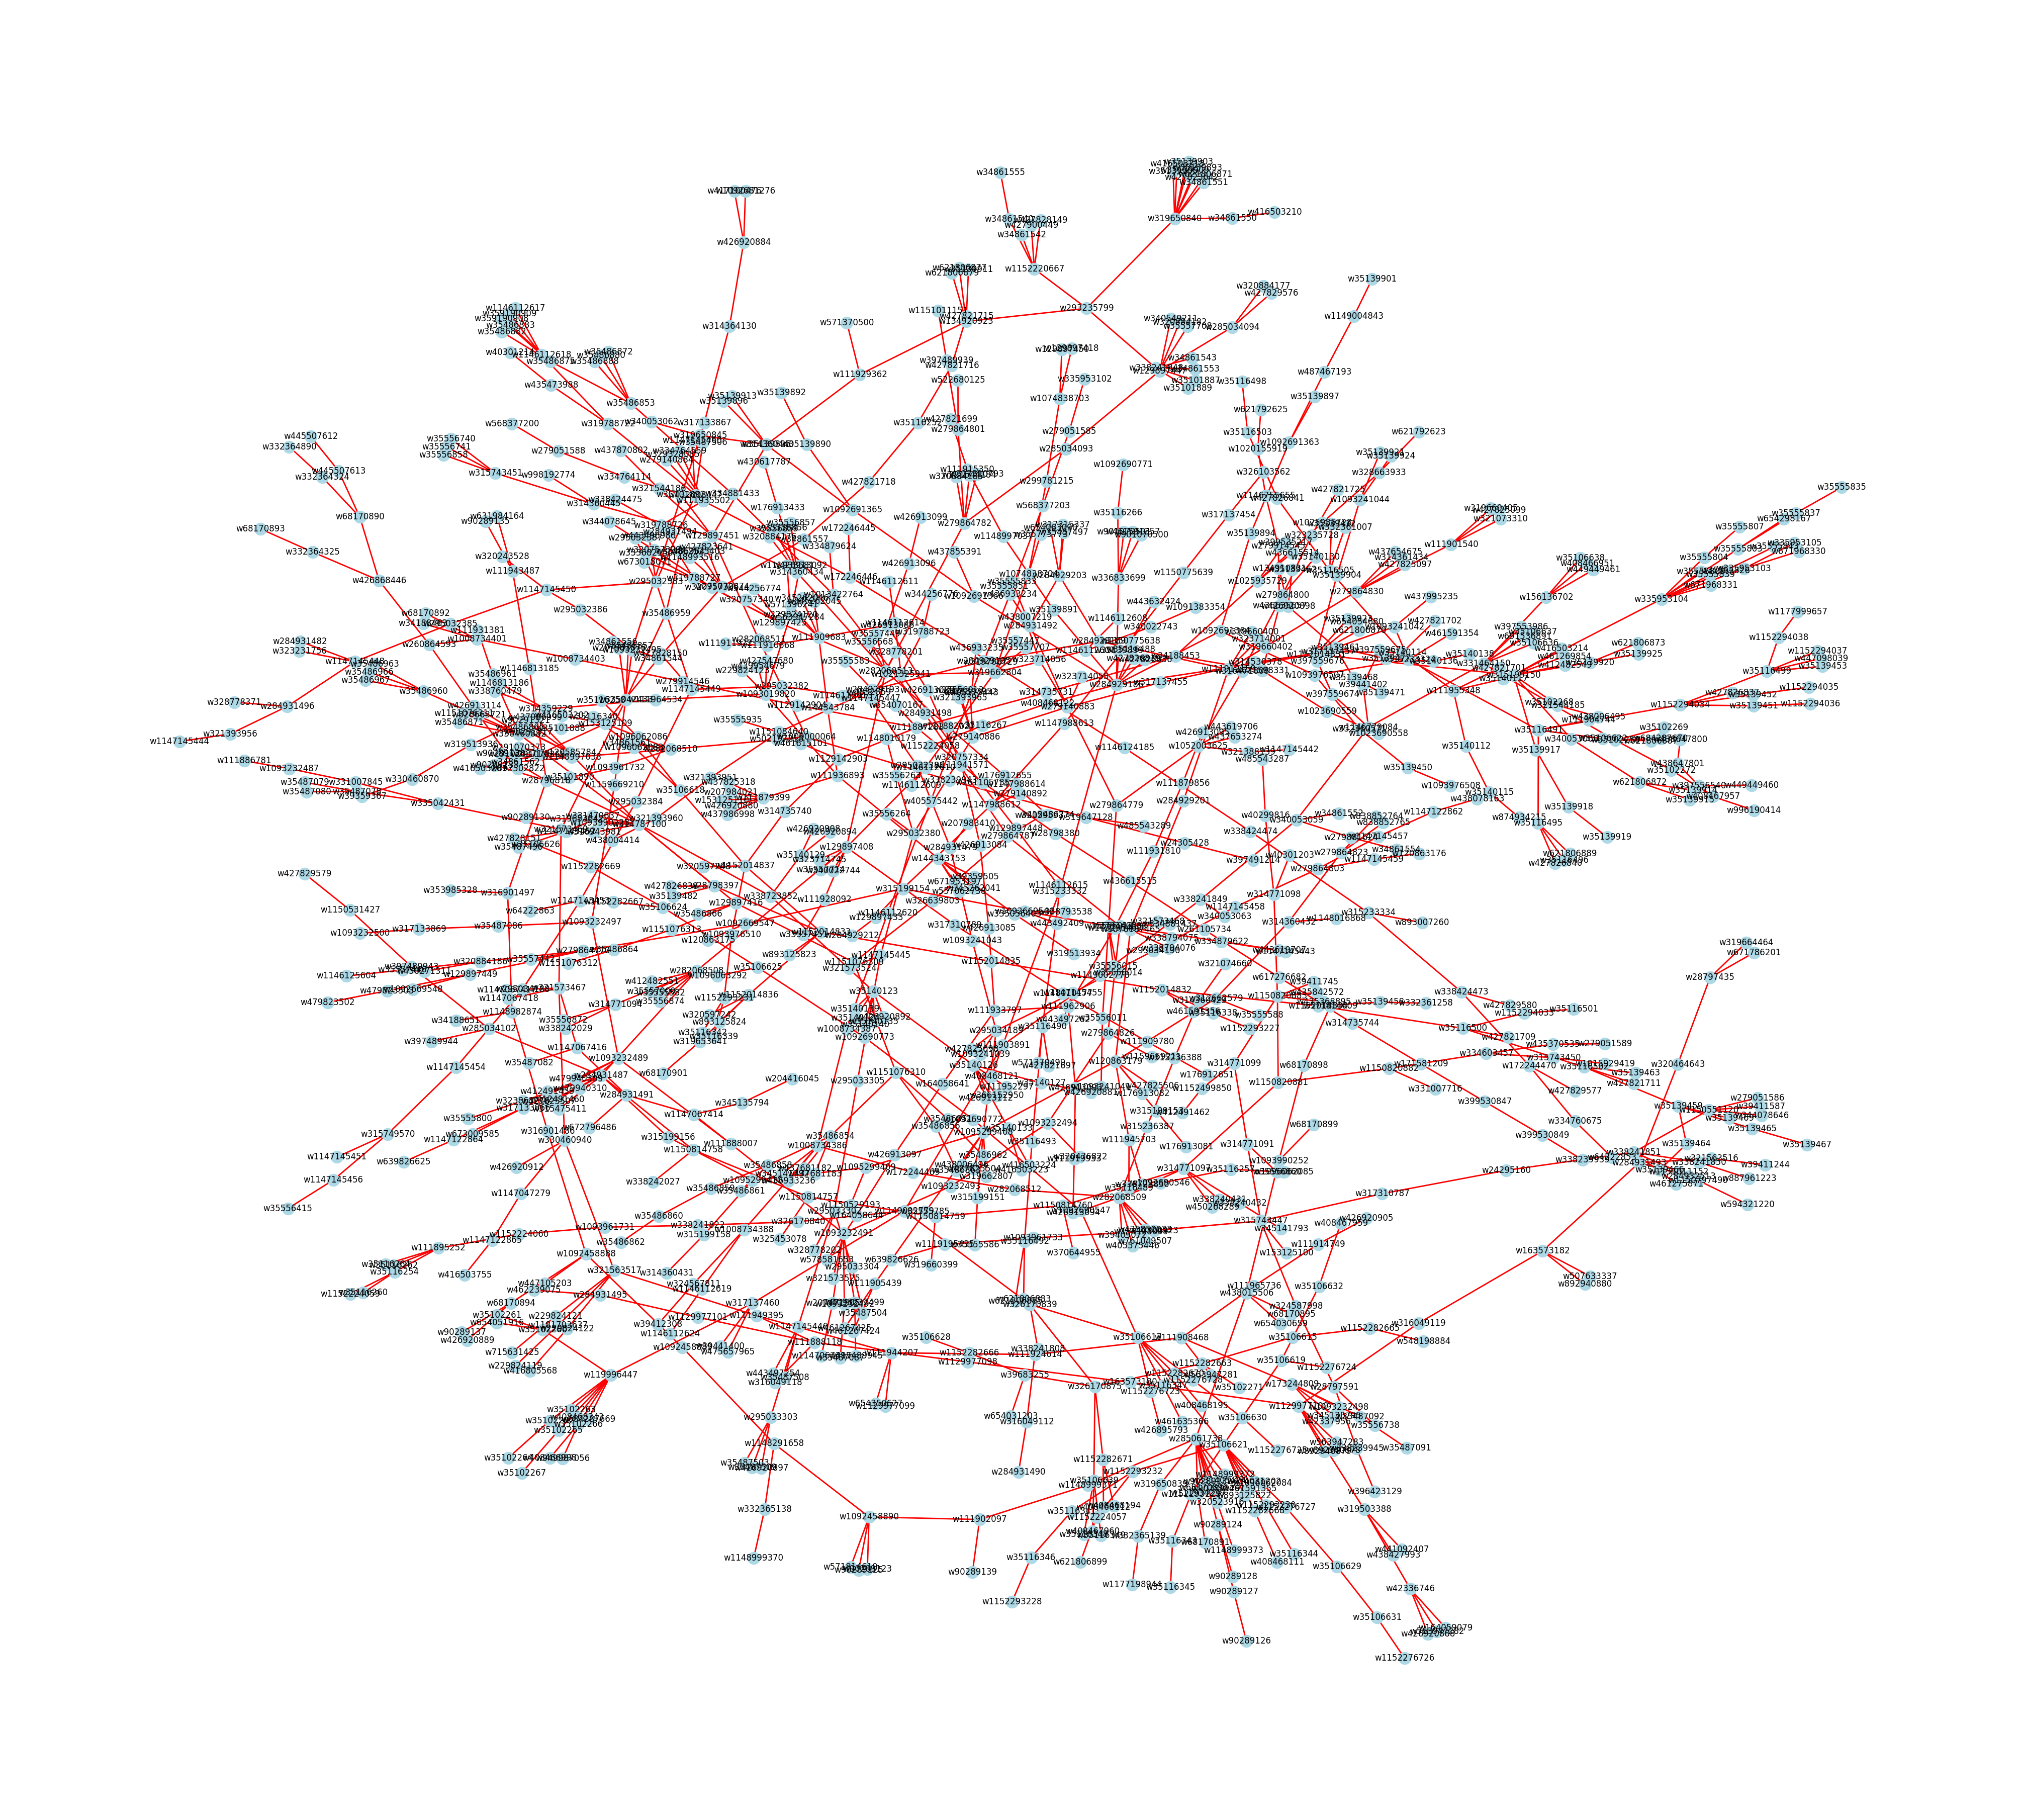

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(mst_prim)

sorted_ids = sorted(set([u for u, v in mst_prim] + [v for u, v in mst_prim]))

subgraph = G.subgraph(sorted_ids)

layout = nx.spring_layout(G)

plt.figure(figsize=(40, 36))

nx.draw(G, pos=layout, with_labels=True, node_color='lightblue', edge_color='gray')

nx.draw_networkx_edges(subgraph, pos=layout, edge_color='red', width=2)

plt.show()